### Importing required libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing the Pneumonia dataset

In [2]:
train_folder="/kaggle/input/chest-xray-pneumonia/chest_xray/train"
test_folder="/kaggle/input/chest-xray-pneumonia/chest_xray/test"
validate_folder="/kaggle/input/chest-xray-pneumonia/chest_xray/val"

## Get names of file in folder(names of pic) by path of folder

In [3]:
normal_folder_test="/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/"
pneumonia_folder_test="/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/"
normal_folder_train="/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/"
pneumonia_folder_train="/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/"
normal_folder_validate="/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/"
pneumonia_folder_validate="/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/"

In [4]:
name_files_normal_train=os.listdir(normal_folder_train)
name_files_pneumonia_train=os.listdir(pneumonia_folder_train)
name_files_normal_test=os.listdir(normal_folder_test)
name_files_pneumonia_test=os.listdir(pneumonia_folder_test)
name_files_normal_validate=os.listdir(normal_folder_validate)
name_files_pneumonia_validate=os.listdir(pneumonia_folder_validate)

In [5]:
name_files_normal_validate

['NORMAL2-IM-1431-0001.jpeg',
 'NORMAL2-IM-1440-0001.jpeg',
 'NORMAL2-IM-1442-0001.jpeg',
 'NORMAL2-IM-1427-0001.jpeg',
 'NORMAL2-IM-1430-0001.jpeg',
 'NORMAL2-IM-1436-0001.jpeg',
 'NORMAL2-IM-1438-0001.jpeg',
 'NORMAL2-IM-1437-0001.jpeg']

## Create dataframes of Image paths and assigning labels

In [6]:
df_train_normal=pd.DataFrame(name_files_normal_train,columns=["images"])
df_train_normal["labels"]=0
df_train_normal["images"]=normal_folder_train+df_train_normal["images"]
#ADDING THE COMPLETE PATH OF IMAGES

df_train_pneumonia=pd.DataFrame(name_files_pneumonia_train,columns=["images"])
df_train_pneumonia["labels"]=1
df_train_pneumonia["images"]=pneumonia_folder_train+df_train_pneumonia["images"]

df_test_normal=pd.DataFrame(name_files_normal_test,columns=["images"])
df_test_normal["labels"]=0
df_test_normal["images"]=normal_folder_test+df_test_normal["images"]

df_test_pneumonia=pd.DataFrame(name_files_pneumonia_test,columns=["images"])
df_test_pneumonia["labels"]=1
df_test_pneumonia["images"]=pneumonia_folder_test+df_test_pneumonia["images"]

df_validate_normal=pd.DataFrame(name_files_normal_validate,columns=["images"])
df_validate_normal["labels"]=0
df_validate_normal["images"]=normal_folder_validate+df_validate_normal["images"]

df_validate_pneumonia=pd.DataFrame(name_files_pneumonia_validate,columns=["images"])
df_validate_pneumonia["labels"]=1
df_validate_pneumonia["images"]=pneumonia_folder_validate+df_validate_pneumonia["images"]

## Concating all these dataframes

In [7]:
DF1=pd.concat([df_train_pneumonia,df_train_normal,df_test_pneumonia,df_test_normal,df_validate_pneumonia,df_validate_normal], ignore_index=True)
DF1.sample(frac=1, random_state=42).reset_index(drop=True)

,images,labels
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,0
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
...,...,...
5851,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
5852,/kaggle/input/chest-xray-pneumonia/chest_xray/...,0
5853,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1
5854,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1


### Convert images to numpy array

In [8]:
DF1["mat_images"]=DF1['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))

In [9]:
DF1.labels.unique()

array([1, 0])

In [10]:
DF1.mat_images[0][0]

array([ 75,  74,  69,  50,   4,   4,   1,  23,  21,  23,  22,  24,  26,
        29,  31,  34,  35,  36,  39,  38,  39,  40,  41,  41,  42,  43,
        42,  44,  45,  45,  44,  48,  46,  45,  45,  45,  43,  49,  51,
        49,  50,  48,  50,  50,  40,  40,  41,  38,  38,  40,  41,  39,
        37,  33,  55,  70,  67,  66,  64,  71,  76,  74,  77,  37,  34,
        41,  43,  44,  42,  42,  39,  44,  47,  48,  46,  46,  47,  48,
        47,  47,  49,  46,  53,  49,  52,  53,  69,  70,  59,  52,  49,
        53,  57,  61,  72,  79,  71,  79,  81,  76,  79,  62,  58,  54,
        50,  50,  46,  54,  57,  65,  64,  61,  64,  49,  60,  62,  61,
        62,  60,  61,  66,  69,  72,  76,  77,  78,  77,  76,  79,  67,
        62,  61,  63,  64,  58,  57,  54,  54,  57,  57,  59,  57,  55,
        54,  54,  54,  53,  48,  61,  91,  79,  72,  79,  77,  78,  54,
        48,  47,  48,  48,  50,  54,  52,  50,  50,  50,  48,  49,  59,
        61,  64,  58,  60,  55,  61,  52,  57,  57,  60,  52,  4

In [11]:
DF1.head()

,images,labels,mat_images
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[75, 74, 69, 50, 4, 4, 1, 23, 21, 23, 22, 24,..."
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[0, 0, 18, 12, 35, 36, 58, 56, 59, 77, 64, 91..."
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[110, 106, 93, 137, 117, 99, 122, 112, 146, 1..."
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[23, 25, 28, 27, 28, 29, 31, 34, 38, 45, 253,..."
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[83, 79, 78, 78, 79, 83, 83, 89, 86, 89, 88, ..."


## Displaying images

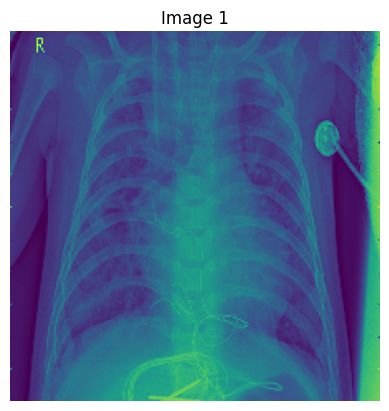

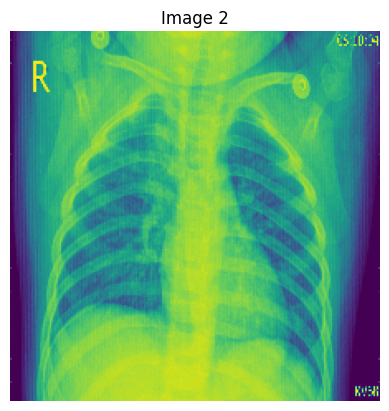

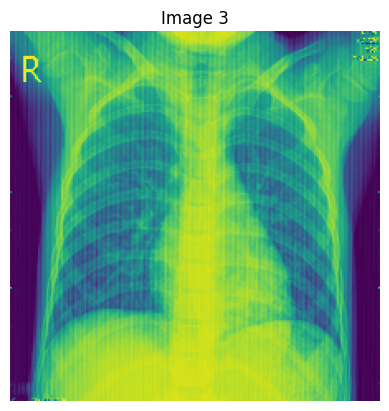

In [12]:
#Displaying images of Pneumonia
DF1.sample(frac=1).reset_index(drop=True)
images_pneumonia= DF1[DF1.labels==1]
for i in range(3):
    image_data = images_pneumonia['mat_images'][i]
    plt.figure()
    plt.imshow(image_data)
    plt.title(f"Image {i + 1}")
    plt.axis('off') 

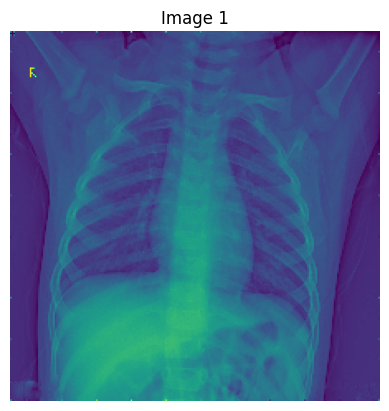

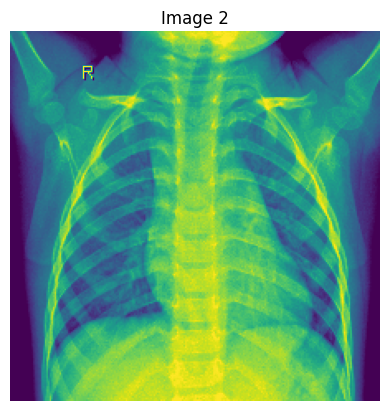

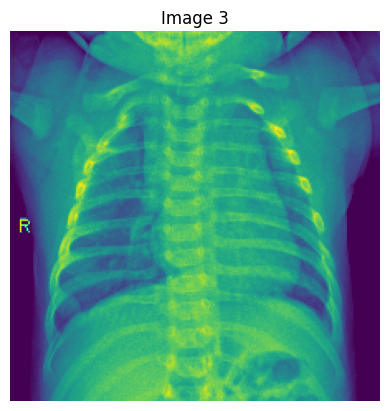

In [13]:
#Displaying normal images
images_normal= DF1[DF1.labels==0].mat_images
images_normal=images_normal.reset_index(drop=True)

for i in range(3):
    image_data = images_normal[i]
    plt.figure()
    plt.imshow(image_data)
    plt.title(f"Image {i + 1}")
    plt.axis('off')



## Importing Tuberculosis dataset

In [14]:
DATA2_TRAIN_NORMAL="/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Normal/"
DATA2_TRAIN_Tuberculosis="/kaggle/input/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database/Tuberculosis/"


### Get names of files in folder (names of images) by path of folder

In [15]:
Normal_img=os.listdir(DATA2_TRAIN_NORMAL)
Tuberculosis_img=os.listdir(DATA2_TRAIN_Tuberculosis)
dnorm=pd.DataFrame(Normal_img,columns=["images"])
dnorm["labels"]=0
dnorm["images"]=DATA2_TRAIN_NORMAL+dnorm["images"]

dtuber=pd.DataFrame(Tuberculosis_img,columns=["images"])
dtuber["labels"]=2
dtuber["images"]=DATA2_TRAIN_Tuberculosis+dtuber["images"]

## Concating normal and tuberculosis dataframes
DF2=pd.concat([dnorm,dtuber],ignore_index=True)
# Adding img arrays to the dataset
DF2["mat_images"]=DF2['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
DF2.sample(frac=1, random_state=42).reset_index(drop=True)

,images,labels,mat_images
0,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0,"[[191, 149, 123, 104, 84, 69, 68, 68, 67, 67, ..."
1,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0,"[[5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,..."
2,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0,"[[18, 11, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, ..."
3,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0,"[[5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,..."
4,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0,"[[21, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5..."
...,...,...,...
4195,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0,"[[4, 5, 6, 5, 4, 4, 4, 5, 3, 106, 119, 127, 13..."
4196,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0,"[[4, 4, 5, 5, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4, 4,..."
4197,/kaggle/input/tuberculosis-tb-chest-xray-datas...,0,"[[76, 60, 47, 38, 34, 32, 31, 32, 32, 34, 34, ..."
4198,/kaggle/input/tuberculosis-tb-chest-xray-datas...,2,"[[107, 108, 108, 109, 110, 110, 111, 109, 108,..."


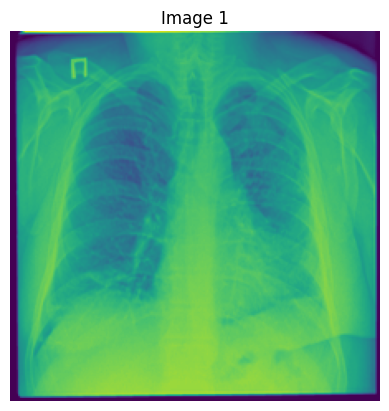

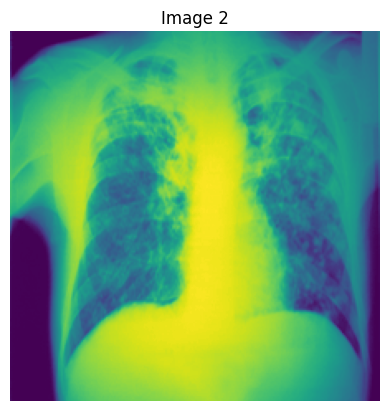

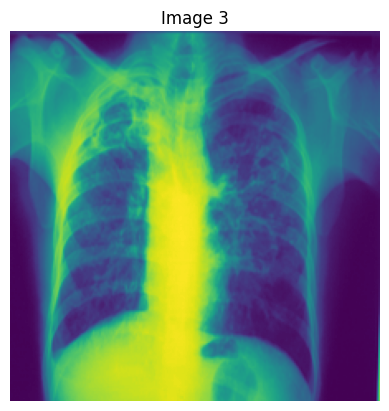

In [16]:
#Displaying TB images
DF2.sample(frac=1).reset_index(drop=True)
images_tb= DF2[DF2.labels==2].mat_images
images_tb=images_tb.reset_index(drop=True)
for i in range(3):
    image_data = images_tb[i]
    plt.figure()
    plt.imshow(image_data)
    plt.title(f"Image {i + 1}")
    plt.axis('off')  # Remove axis labels

## Concating TB and Pneumonia datasets

In [17]:
#Final dataframe
df=pd.concat([DF1,DF2],ignore_index=True)
df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,images,labels,mat_images
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[75, 74, 69, 50, 4, 4, 1, 23, 21, 23, 22, 24,..."
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[0, 0, 18, 12, 35, 36, 58, 56, 59, 77, 64, 91..."
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[110, 106, 93, 137, 117, 99, 122, 112, 146, 1..."
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[23, 25, 28, 27, 28, 29, 31, 34, 38, 45, 253,..."
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,1,"[[83, 79, 78, 78, 79, 83, 83, 89, 86, 89, 88, ..."
...,...,...,...
10051,/kaggle/input/tuberculosis-tb-chest-xray-datas...,2,"[[2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1,..."
10052,/kaggle/input/tuberculosis-tb-chest-xray-datas...,2,"[[17, 17, 19, 19, 19, 21, 22, 23, 23, 24, 25, ..."
10053,/kaggle/input/tuberculosis-tb-chest-xray-datas...,2,"[[242, 254, 52, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, ..."
10054,/kaggle/input/tuberculosis-tb-chest-xray-datas...,2,"[[181, 205, 201, 201, 201, 203, 204, 206, 211,..."


In [18]:
df.labels.value_counts()

labels
0    5083
1    4273
2     700
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='labels'>

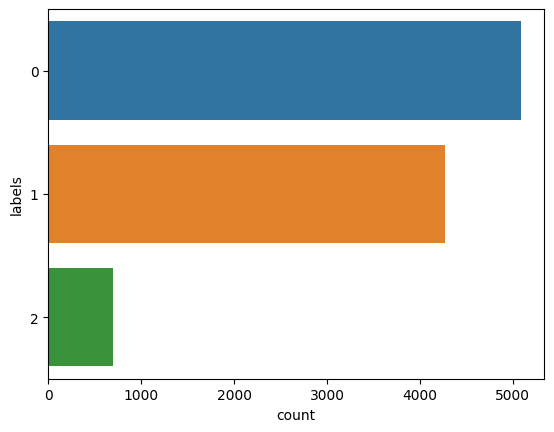

In [19]:
sns.countplot(y='labels',data=df)

### 0: Normal  
### 1: Pneumonia    
### 2: Tuberculosis

## Seperating X and Y

In [20]:
X=df["mat_images"]
y=df["labels"]

## Normalization of Data


In [21]:
X=X/255

In [22]:
X.shape

(10056,)

In [23]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10051    2
10052    2
10053    2
10054    2
10055    2
Name: labels, Length: 10056, dtype: int64

In [24]:
from tensorflow.keras.utils import to_categorical
Y=to_categorical(y,3)
# The class labels [0, 1, 2] will be transformed into the following one-hot encoded format:
# 0 becomes [1, 0, 0]
# 1 becomes [0, 1, 0]
# 2 becomes [0, 0, 1]
Y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

## Splitting the dataset into Training and Testing datasets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8044,)
(8044, 3)
(2012,)
(2012, 3)


In [26]:
X[0]

array([[0.29411765, 0.29019608, 0.27058824, ..., 0.63921569, 0.71372549,
        0.75294118],
       [0.24705882, 0.20392157, 0.2627451 , ..., 0.65882353, 0.69411765,
        0.76078431],
       [0.2       , 0.22745098, 0.0745098 , ..., 0.65098039, 0.69411765,
        0.77647059],
       ...,
       [0.05098039, 0.05098039, 0.04705882, ..., 0.76470588, 0.76470588,
        0.76470588],
       [0.05098039, 0.05098039, 0.04705882, ..., 0.76078431, 0.76862745,
        0.76862745],
       [0.05098039, 0.05098039, 0.04705882, ..., 0.76470588, 0.76078431,
        0.77254902]])

## Converting the features into NumPy arrays

In [27]:
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train], dtype=object) # creating an np array X_train that contains all images in type np array
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)


In [28]:
X_train[0]

<tf.Tensor: shape=(224, 224), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , ..., 0.99607843, 0.48235294,
        0.0627451 ],
       [0.        , 0.        , 0.        , ..., 0.03137255, 0.9607843 ,
        0.05098039],
       [0.        , 0.        , 0.        , ..., 0.9647059 , 0.03137255,
        0.03529412],
       ...,
       [0.        , 0.00392157, 0.        , ..., 0.        , 0.        ,
        0.00392157],
       [0.00392157, 0.48235294, 0.99215686, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.04705882, 0.99215686, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157]], dtype=float32)>

In [29]:
X[0]

array([[0.29411765, 0.29019608, 0.27058824, ..., 0.63921569, 0.71372549,
        0.75294118],
       [0.24705882, 0.20392157, 0.2627451 , ..., 0.65882353, 0.69411765,
        0.76078431],
       [0.2       , 0.22745098, 0.0745098 , ..., 0.65098039, 0.69411765,
        0.77647059],
       ...,
       [0.05098039, 0.05098039, 0.04705882, ..., 0.76470588, 0.76470588,
        0.76470588],
       [0.05098039, 0.05098039, 0.04705882, ..., 0.76078431, 0.76862745,
        0.76862745],
       [0.05098039, 0.05098039, 0.04705882, ..., 0.76470588, 0.76078431,
        0.77254902]])

In [30]:
X_test = np.array([np.array(x, dtype=np.float32) for x in X_test], dtype=object)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8044, 224, 224)
(8044, 3)
(2012, 224, 224)
(2012, 3)


## Creating a Model

In [32]:
## CNN Model
layers = [
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 1)), 
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
]

# Create a Sequential model and pass the layers list
model_1 = Sequential(layers)

# Compile the model
model_1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
model_1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=64,verbose= True) 

Epoch 1/25
126/126 [==============================] - 25s 142ms/step - loss: 0.3843 - accuracy: 0.8467 - val_loss: 0.2166 - val_accuracy: 0.9210
Epoch 2/25
126/126 [==============================] - 15s 122ms/step - loss: 0.1986 - accuracy: 0.9276 - val_loss: 0.1831 - val_accuracy: 0.9344
Epoch 3/25
126/126 [==============================] - 15s 122ms/step - loss: 0.1445 - accuracy: 0.9487 - val_loss: 0.2017 - val_accuracy: 0.9240
Epoch 4/25
126/126 [==============================] - 15s 122ms/step - loss: 0.1193 - accuracy: 0.9575 - val_loss: 0.1252 - val_accuracy: 0.9573
Epoch 5/25
126/126 [==============================] - 15s 122ms/step - loss: 0.0965 - accuracy: 0.9661 - val_loss: 0.1220 - val_accuracy: 0.9587
Epoch 6/25
126/126 [==============================] - 15s 122ms/step - loss: 0.0864 - accuracy: 0.9676 - val_loss: 0.1193 - val_accuracy: 0.9592
Epoch 7/25
126/126 [==============================] - 15s 122ms/step - loss: 0.0748 - accuracy: 0.9740 - val_loss: 0.1370 - val_ac

## Plotting the Model

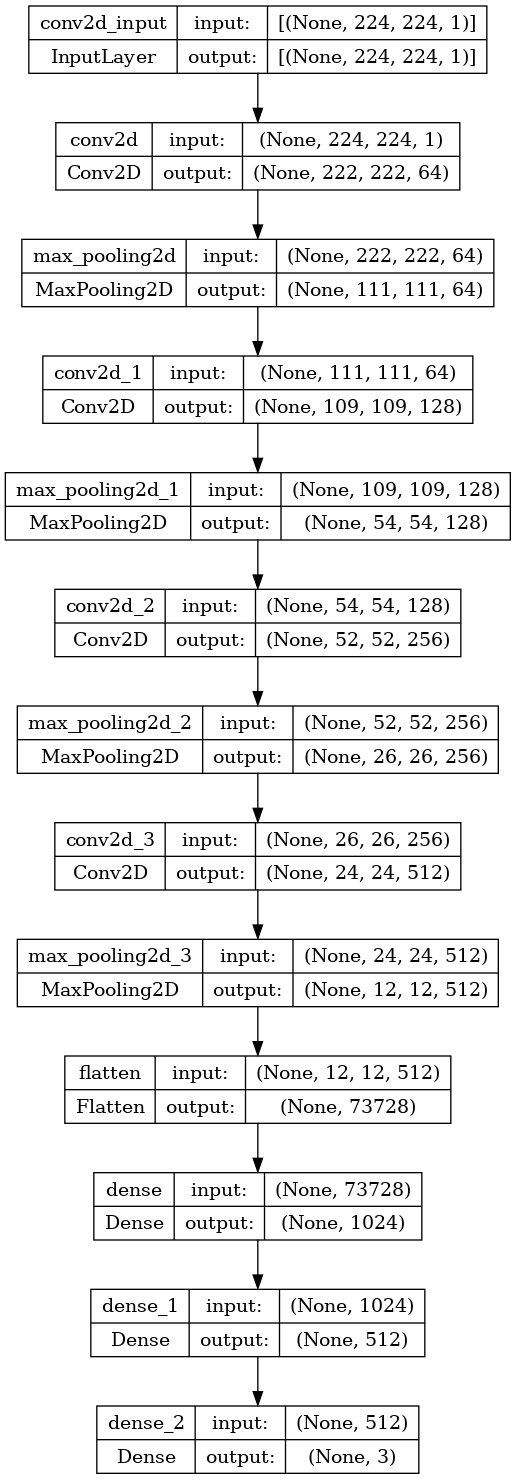

In [34]:
## Save the model diagram to a file (e.g., 'model_diagram.png')
plot_model(model_1, to_file='model_diagram.png', show_shapes=True)
plot_model(model_1, show_shapes=True)


In [35]:


model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

## Training the Model

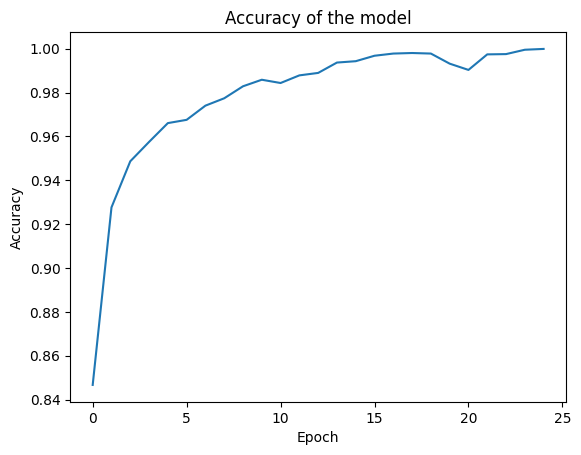

In [36]:
plt.plot(model_1.history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

## Making Predictions

In [37]:
y_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [38]:
y_pred = model_1.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

63/63 [==============================] - 2s 18ms/step


In [39]:
y_pred = model_1.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

63/63 [==============================] - 1s 18ms/step


array([0, 1, 1, ..., 0, 1, 1])

In [45]:
import joblib

# Save the model to a binary file
filename = 'model.bin'
joblib.dump(model_1, filename)


['model.bin']

In [40]:
y_test.shape

(2012, 3)

In [41]:
np.unique(y_true)

array([0, 1, 2])

## Results

In [42]:
pd.Series(y_true).value_counts()

0    1023
1     857
2     132
Name: count, dtype: int64

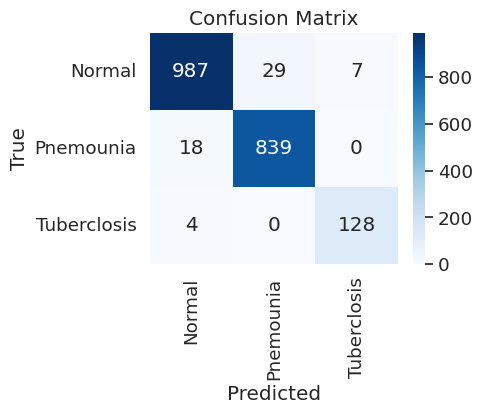

In [43]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
# Create a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True , fmt="d", cmap="Blues", xticklabels=['Normal', 'Pnemounia', 'Tuberclosis'], yticklabels=['Normal', 'Pnemounia', 'Tuberclosis'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='weighted')
f1

0.9711788517274684